<a href="https://colab.research.google.com/github/niuhaoyu16/nematodes_detection_using_walabot/blob/main/Nematodes_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import io
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

In [28]:
dataset= io.loadmat('levels.mat')
labels = io.loadmat('y.mat')
X = dataset['X']
y = labels['y']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

X_train = num_pipeline.fit_transform(X_train)

In [31]:
#method 1, not good
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train)

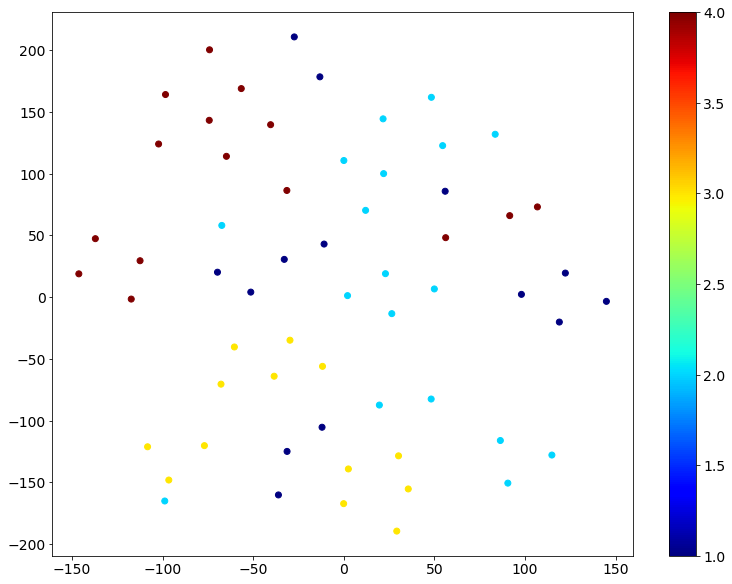

In [32]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('on')
plt.colorbar()
plt.show()

PCA took 0.0s.


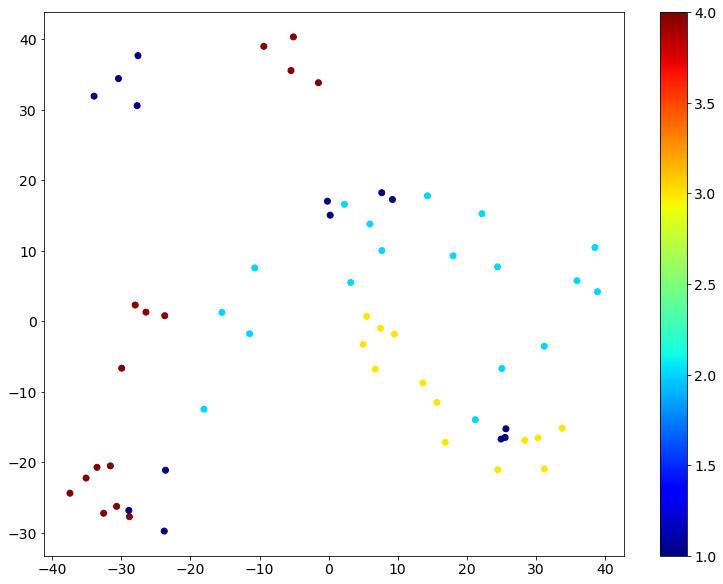

In [33]:
#method 2
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train, y_train)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('on')
plt.colorbar() 
plt.show()

lle took 0.0s.


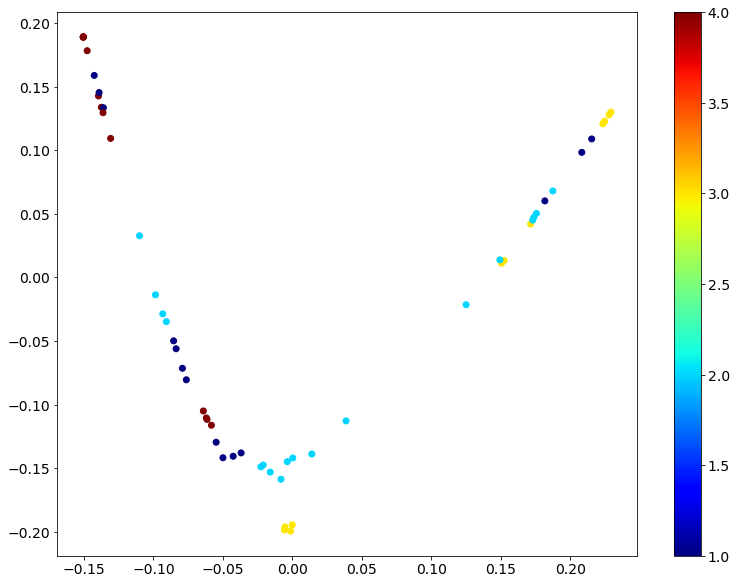

In [34]:
# method 3
from sklearn.manifold import LocallyLinearEmbedding
import time

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_train, y_train)
t1 = time.time()
print("lle took {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_lle_reduced[:, 0], X_lle_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('on')
plt.colorbar()
plt.show()

MDS took 0.4s


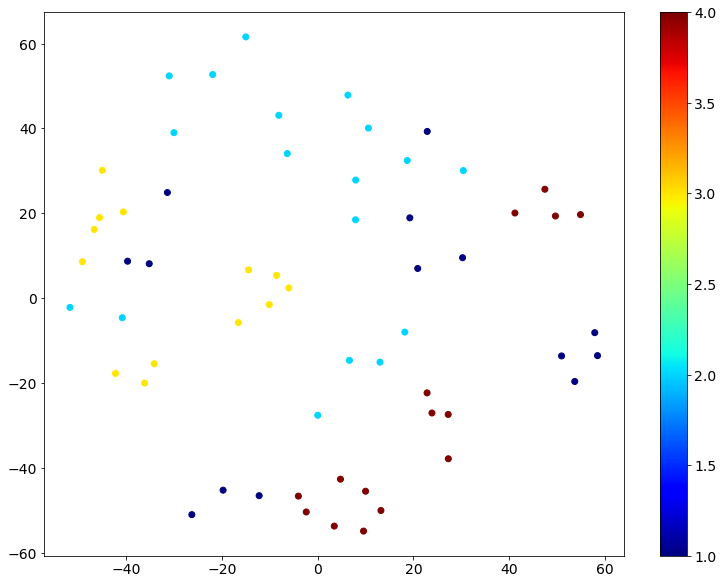

In [35]:
#method 4
from sklearn.manifold import MDS

t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X_train, y_train)
t1 = time.time()
print("MDS took {:.1f}s".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_mds_reduced[:, 0], X_mds_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('on')
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LDA took 0.0s.


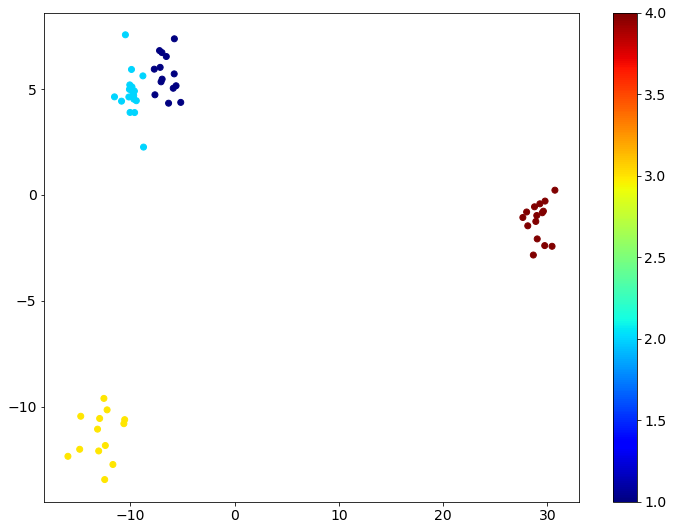

In [36]:
#method 5
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(12,9))
plt.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('on')
plt.colorbar()
plt.show()